# Cloudy Modeling of PDR and Dark Regions in Various Limiting Cases
## PS2 - Problem 3 - 3/4/24

This notebook contains code to plot models of a photodissociation and dark region, as calculated by models hw2_pdr.in and variants. 

We will model an initial ‘fiducial’ PDR and then also explore how the structure of the PDR changes as we vary several key parameters (density, abundance, CR ionization rate).  

You already have experience varying the density in a cloudy input file.  To vary abundances we'd like to assume a constant dust-to-metals ratio, so we vary them together by setting the "metals and grains" command. (Note you should leave the grains PAH 3.0 as is.)  Similarly we vary the cosmic ray level by setting an appropriate fractional level.

Make models for 

* Density: log n = 4, 2, 6
* Metals/grains, make models for 1.0, 0.1 and 3.0 metallicity/grains
* CR, make models for 1.0, 0.001 and 1000.0   times the background Cosmic Ray density

The first of each of these is the 'fiducial' PDR. You don't need to do a full 3-d exploration of all parameters, you can explore each quantity (density, metals/grains and CR) along 1-d

Note that in all cases the PDR is set to be illuminated by a stellar blackbody with 43,600 K, log Q 49.3, but we pass the star's light through 1e23 cm2 of hydrogen to effectively extinguish H-ionizing photons.  So we are only modeling the non-ionizing PDR and dark cloud region.

As the light penetrates deeper into the region, it is attenuated by dust, and we follow the model until the attenuation reaches Av=10.  In some cases the model might stop before then (e.g. low metallicity).

Answer the following questions:

* For the fiducial PDR/dark region – how do species ionization and fractions and **molecular compositions** vary with Av?  In each region (low Av, high Av) which processes dominate the heating and cooling rates?

* How does the PDR/dark region structure (species ionization and fractions, **molecular composition** and temperature) vary as we change the key parameters?   Why would these vary in the different limiting cases?

Explain your results and make plots/figures useful for illustrating your points (see below). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy import units as u
from astropy.io import ascii
import pandas as pd

%matplotlib inline

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

import pyCloudy as pc
pc.log_.level = 3

## Run Model

In [8]:
pc.config.cloudy_exe = '/Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe'

     _Config: cloudy_exe set to /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe


In [2]:
# constant number density

dir_ = 'runs/constant_density'
model_name = 'test'  
full_model_name = '{0}{1}'.format(dir_, model_name)

c_input = pc.CloudyInput(full_model_name)

#c_input.print_input(to_file = True, verbose = False)

pc.log_.message('Running {0}'.format(model_name), calling = 'test1')
pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')

c_input.run_cloudy()
pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

     _Config: cloudy_exe set to /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe
     test1: Running test
     run_cloudy: running:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
     run_cloudy: ending:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
   test1: Cloudy ended after seconds: in 388.30893087387085


In [15]:
# power law number density

dir_ = 'runs/power_law_density_faraway/'
model_name = 'test'  
full_model_name = '{0}{1}'.format(dir_, model_name)

c_input = pc.CloudyInput(full_model_name)

pc.log_.message('Running {0}'.format(model_name), calling = 'test1')
pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')

c_input.run_cloudy()
pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

     test1: Running test
     run_cloudy: running:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
     run_cloudy: ending:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
   test1: Cloudy ended after seconds: in 780.0789630413055


In [16]:
import os
import shutil

In [24]:
alpha_value = [450.09986513107214,
 441.8566878462761,
 433.605065047318,
 425.34460886516615,
 417.0749058588441,
 408.79551424254277,
 400.5059624509475,
 392.20574530215487,
 383.89432069506756,
 375.5711076250257,
 367.23548051520424,
 358.8867659103055,
 350.52423461760907,
 342.1471024191071,
 333.75451663316295,
 325.345552921832,
 316.9191997950601,
 308.4743646277641,
 300.009844976095,
 291.5243258812088,
 283.0163495659604]

In [2]:
pwd

'/Users/messeremichael/Documents/GradSchool/ISM/Final Project'

In [29]:
for i, zheight in enumerate(np.arange(0,2100,100)):
    
    # Specify the original folder path
    original_folder_path = 'runs/power_law_density_30kpc_disk'  # Replace with the path to your folder containing the .in file

    # Specify the name of the copied folder
    copied_folder_name = '../power_law_density_30kpc_disk' + '_' + str(zheight)

    # Specify the file name of the .in file within the folder
    file_name = 'test.in'

    # Construct the path to the .in file within the original folder
    original_file_path = os.path.join(original_folder_path, file_name)

    # Construct the path to the copied folder
    copied_folder_path = os.path.join(original_folder_path, copied_folder_name)

    # Create a copy of the entire folder
    shutil.copytree(original_folder_path, copied_folder_path)

    # Specify the value to be replaced
    old_value = '450'
    new_value = str(alpha_value[i])

    # Construct the path to the .in file within the copied folder
    copied_file_path = os.path.join(copied_folder_path, file_name)

    # Open the .in file in read mode
    with open(copied_file_path, 'r') as file:
        content = file.read()

    # Replace the old value with the new value
    modified_content = content.replace(old_value, new_value)

    # Open the .in file in write mode to save the modified content
    with open(copied_file_path, 'w') as file:
        file.write(modified_content)

    print(f"Value '{old_value}' replaced with '{new_value}' in '{file_name}' within the copied folder '{copied_folder_name}'.")


Value '450' replaced with '450.09986513107214' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_0'.
Value '450' replaced with '441.8566878462761' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_100'.
Value '450' replaced with '433.605065047318' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_200'.
Value '450' replaced with '425.34460886516615' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_300'.
Value '450' replaced with '417.0749058588441' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_400'.
Value '450' replaced with '408.79551424254277' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_500'.
Value '450' replaced with '400.5059624509475' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_600'.
Value '450' replaced with '392.20574530215487' in 'test.in' within the copied folder '../power_law_density_30kpc_disk_700'.
Value '450' rep

In [32]:
for i, zheight in enumerate(np.arange(0,2100,100)):

    dir_ = 'runs/power_law_density_30kpc_disk' + '_' + str(zheight) + '/'
    model_name = 'test'  
    full_model_name = '{0}{1}'.format(dir_, model_name)
    
    print(full_model_name)

    c_input = pc.CloudyInput(full_model_name)

    pc.log_.message('Running {0}'.format(model_name), calling = 'test1')
    pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')

    c_input.run_cloudy()
    pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

runs/power_law_density_30kpc_disk_0/test
     test1: Running test
     run_cloudy: running:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
     run_cloudy: ending:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
   test1: Cloudy ended after seconds: in 781.6861691474915
runs/power_law_density_30kpc_disk_100/test
     test1: Running test
     run_cloudy: running:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
     run_cloudy: ending:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
   test1: Cloudy ended after seconds: in 763.5839791297913
runs/power_law_density_30kpc_disk_200/test
     test1: Running test
     run_cloudy: running:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
     run_cloudy: ending:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
   test1: Cloudy ended after seconds: in 740.6778371334076
runs/power_law_den

In [ ]:
alpha_value = [441.0401063429482,
 441.0401063429551,
 441.04010634294764,
 441.04010634296486,
 441.0401063429502,
 441.0401063429613,
 441.0401063429493,
 441.04010634295145,
 441.0401063429513,
 441.0401063429619,
 441.040106342953,
 441.0401063429565,
 441.0401063429526,
 441.0401063429559,
 441.04010634296424,
 441.0401063429528,
 441.04010634295526,
 441.0401063429572,
 441.0401063429612,
 441.04010634296,
 441.04010634295014]

constant_value = [-5.488619374464995,
 -5.590566435944631,
 -5.692513497424268,
 -5.794460558903904,
 -5.896407620383541,
 -5.998354681863177,
 -6.100301743342814,
 -6.2022488048224504,
 -6.304195866302087,
 -6.4061429277817235,
 -6.50808998926136,
 -6.610037050740997,
 -6.711984112220633,
 -6.81393117370027,
 -6.915878235179907,
 -7.017825296659543,
 -7.11977235813918,
 -7.221719419618816,
 -7.323666481098453,
 -7.425613542578089,
 -7.527560604057726]

In [ ]:
np.arange(10)

In [ ]:
# run CLOUDY model for problem 2, varying density


model_number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
density = [1, 2, 3, 4, 5]

for i in range(len(density)):

    model_name = 'disk_' + str(model_number[i])   
    full_model_name = '{0}{1}'.format(dir_, model_name)
    #dens = density[i] #log cm-3, we'll assume uniform density
    #Teff = 36870 # Effective blackbody temperature of Central Star in K
    #qH = 48.75 # Rate of production of Hydrogen ionizing photons in log photons s^-1 
    #abundance_predef = 'hii region'  # Use pre-defined hii region abundances
    #metals = 1   # Metal scaling for abundances (for Problem 3)
    r_min = 5e16 # cm Inner radius (use as default)
    #r_max = 2e18 # cm  # Outer radius (if needed)
    #dist = 1.0 # kpc, only used for final output spectra

    # Emission lines that we may be using for analysis of model outputs
    emis_tab = ['H  1  4861.33A',
                'H  1  6562.81A',
                'Ca B  5875.64A',
                'N  2  6583.45A',
                'O  1  6300.30A',
                'O  2  3726.03A',
                'O  2  3728.81A',
                'S  2  6716.44A',
                'S  2  6730.82A',            
                'O  3  5006.84A',
                'BLND  4363.00A',
                'Cl 3  5517.71A',
                'Cl 3  5537.87A',
                'O  1  63.1679m',
                'O  1  145.495m',
                'C  2  157.636m']

    # Defining the object that will manage the input file for Cloudy
    c_input = pc.CloudyInput(full_model_name)

    # Filling the object with the parameters
    # Defining the ionizing SED: Effective temperature and luminosity.
    # The lumi_unit is one of the Cloudy options, like "luminosity solar", "q(H)", "ionization parameter", etc... 
    #c_input.set_BB(Teff = Teff, lumi_unit = 'q(H)', lumi_value = qH)

    # Example, if you would like to use the ionization parameter U to set luminosity
    # c_input.set_BB(Teff = Teff, lumi_unit = 'ionization parameter', lumi_value = logU)

    # Defining the density and profile
    dens = -5.600659858271809
    power = 450
    c_input.set_cste_density(dens=dens,other) # constant density

    # Defining the inner radius. A second parameter could be the outer radius (matter-bounded nebula).
    #c_input.set_radius(r_in=np.log10(r_min),r_out=np.log10(r_max))
    c_input.set_radius(r_in=np.log10(r_min))

    #c_input.set_abund(ab_dict = abund, nograins = True)
    c_input.set_abund(predef=abundance_predef, nograins = True,metals=metals)  # Use pre-defined hii region abundances

    # Other options from above
    c_input.set_other(options)

    c_input.set_iterate(10) # (0) for no iteration, () for one iteration, (N) for N iterations.
    #c_input.set_sphere() # () or (True) : sphere, or (False): open geometry.
    c_input.set_emis_tab(emis_tab) # better use read_emis_file(file) for long list of lines, where file is an external file.
    #c_input.set_distance(dist=dist, unit='kpc', linear=True) # unit can be 'kpc', 'Mpc', 'parsecs', 'cm'. If linear=False, the distance is in log.

    # Writing the Cloudy inputs. to_file for writing to a file (named by full_model_name). verbose to print on the screen.
    c_input.print_input(to_file = True, verbose = False)

    # CHANGE THIS DIRECTORY BELOW
    pc.config.cloudy_exe = '/home/x-mmessere/c23.01/source/cloudy.exe'

    # Printing some message to the screen
    pc.log_.message('Running {0}'.format(model_name), calling = 'test1')

    # Running Cloudy with a timer. Here we reset it to 0.
    pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')
    c_input.run_cloudy()
    pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

In [ ]:
# save models in array

model_number = [2, 3, 4, 5, 6]
mod_dens = []

for i in range(len(model_number)):

    model_name = 'hw1_v' + str(model_number[i])   
    full_model_name = '{0}{1}'.format(dir_, model_name)
    mod_dens.append(pc.CloudyModel(full_model_name))

In [10]:
# power law number density

dir_ = 'runs/power_law_density/'
model_name = 'test'  
full_model_name = '{0}{1}'.format(dir_, model_name)

c_input = pc.CloudyInput(full_model_name)

pc.log_.message('Running {0}'.format(model_name), calling = 'test1')
pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')

c_input.run_cloudy()
pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

     test1: Running test
     run_cloudy: running:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
     run_cloudy: ending:  /Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe -p test
   test1: Cloudy ended after seconds: in 380.78208899497986


In [11]:
model = pc.CloudyModel(full_model_name)

     CloudyModel runs/power_law_density/test: Creating CloudyModel for runs/power_law_density/test
     CloudyModel runs/power_law_density/test: runs/power_law_density/test.rad read
     CloudyModel runs/power_law_density/test: Number of zones: 300
     CloudyModel runs/power_law_density/test: runs/power_law_density/test.phy read
     CloudyModel runs/power_law_density/test: runs/power_law_density/test.ele_H read
     CloudyModel runs/power_law_density/test: filling H with 3 columns
     CloudyModel runs/power_law_density/test: runs/power_law_density/test.ele_He read
     CloudyModel runs/power_law_density/test: filling He with 3 columns
     CloudyModel runs/power_law_density/test: runs/power_law_density/test.ele_C read
     CloudyModel runs/power_law_density/test: filling C with 13 columns
     CloudyModel runs/power_law_density/test: runs/power_law_density/test.ele_N read
     CloudyModel runs/power_law_density/test: filling N with 8 columns
     CloudyModel runs/power_law_density/t

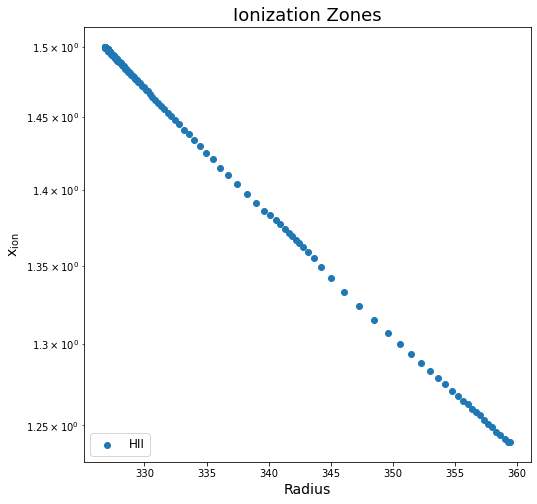

In [12]:
# Plot ionization fractions (for Problem 1, and useful for 2 and 3)
plt.figure(figsize=(8,8))
plt.scatter(model.radius/3.06e21, model.nH, label = 'HII')
#plt.scatter(model.radius, model.get_ionic('H', 0), label = 'HI')
#plt.plot(model.radius, model.get_ionic('He', 0), label = 'HeI')
#plt.plot(model.radius, model.get_ionic('He', 1), label = 'HeII')
#plt.plot(model.radius, model.get_ionic('He', 2), label = 'HeIII')
plt.xlabel('Radius',fontsize=14)
plt.ylabel(r'$x_{ion}$',fontsize=14)
plt.title('Ionization Zones',fontsize=18)
plt.legend(loc=3,fontsize=12)
plt.yscale('log')


In [ ]:
pc.config.cloudy_exe = '/Users/messeremichael/Documents/Software/c23.01/source/cloudy.exe'

for i in range(7):
    
    dir_ = 'pdr/'
    model_name = 'ps2_pdr' + str(i)   
    full_model_name = '{0}{1}'.format(dir_, model_name)
    
    c_input = pc.CloudyInput(full_model_name)
    
    pc.log_.message('Running {0}'.format(model_name), calling = 'test1')
    pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')
    
    c_input.run_cloudy()
    pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

## Reading the Output

These can be used to read main cloudy input files  .ovr (overview), .mol (species densities), .col (cooling rates and fractions), .het (heating rates and fractions)

In [ ]:
# Functions for reading main cloudy input files  .ovr (overview), .mol (species densities), .col (cooling rates and fractions), .het (heating rates and fractions)

def read_overview(model_name,path):
    file=model_name+'.ovr'
    return(Table.from_pandas(pd.read_table(path+file)))

def read_molecule(model_name,path):
    file=model_name+'.mol'
    return(Table.from_pandas(pd.read_table(path+file)))

def read_cooling(model_name,path):
    file=path+model_name+'.col'
    with open(file) as f:
        ftable = f.readlines()
    f.close()
    rows=len(ftable)    
    
    # First find which molecule/processes are listed in the cooling table at a given radii
    coolstr=[]
    for line in ftable[1:rows]:     # skip comment header
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
         # find process string in every other, starting at 6th column
        coolstr=np.concatenate((coolstr,np.array(row[5:lrow:2])))  

    # Make an array of the unique labels from above    
    cool_unique=np.unique(coolstr)

    # Build two arrays to contain the cooling table info, and the cooling fraction
    ulen=len(cool_unique)
    info=['depth_cm','Temp','Heat_tot','Cool_tot','NotUsed']
    coolarr_info=np.zeros((rows-1,5),dtype='float64')
    coolarr_frac=np.zeros((rows-1,ulen),dtype='float64')

    # Now cycle through file again to extract info and cooling fractions for each entry found in the table
    for line,index in zip(ftable[1:rows],np.arange(rows-1)):
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
        coolarr_info[index,:]=np.float64(np.array(row[0:5]))
        # find process string in every other, starting at 6th column
        typestr=np.array(row[5:lrow:2])   
        # find fraction is then in every other, starting at 7th column
        val=np.float64(np.array(row[6:lrow:2]))
        for t,v in zip(typestr,val):
            p=np.argwhere(t==cool_unique)
            coolarr_frac[index,p[0]]=v

    t_cool_info=Table(coolarr_info,names=info)
    t_cool_frac=Table(coolarr_frac,names=cool_unique)
    return(t_cool_info,t_cool_frac)

def read_heating(model_name,path):
    file=path+model_name+'.het'
    with open(file) as f:
        ftable = f.readlines()
    f.close()
    # for heating, there may be more rows than we want
    init_rows=len(ftable)    
    rowflg=np.zeros(init_rows)


    # First find which molecule/processes are listed in the heating table at a given radii
    heatstr=[]
    for line,index in zip(ftable[1:init_rows],np.arange(init_rows-1)):     # skip comment header
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
        if (lrow>5):
         # find process string in every other, starting at 6th column
            heatstr=np.concatenate((heatstr,np.array(row[5:lrow:2])))  
            rowflg[index+1]=1    # +1 to account for header line
    
    rows=np.sum(rowflg).astype("int64")
    ftable_tmp=np.array(ftable)
    p=np.where(rowflg==1)
    ftable=ftable_tmp[p[0]]   # note this table has no header
    
    # Make an array of the unique labels from above    
    heat_unique=np.unique(heatstr)

    # Build two arrays to contain the cooling table info, and the cooling fraction
    ulen=len(heat_unique)
    info=['depth_cm','Temp','Heat_tot','Cool_tot','NotUsed']
    heatarr_info=np.zeros((rows,5),dtype='float64')    # slightly different from cool arr since no header
    heatarr_frac=np.zeros((rows,ulen),dtype='float64')   # slightly different from cool arr since no header


    # Now cycle through file again to extract info and cooling fractions for each entry found in the table
    for line,index in zip(ftable[0:rows],np.arange(rows)):
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
        heatarr_info[index,:]=np.float64(np.array(row[0:5]))
        # find process string in every other, starting at 6th column
        typestr=np.array(row[5:lrow:2])   
        # find fraction is then in every other, starting at 7th column
        val=np.float64(np.array(row[6:lrow:2]))
        for t,v in zip(typestr,val):
            p=np.argwhere(t==heat_unique)
            heatarr_frac[index,p[0]]=v

    t_heat_info=Table(heatarr_info,names=info)
    t_heat_frac=Table(heatarr_frac,names=heat_unique)
    return(t_heat_info,t_heat_frac)


In [ ]:
t_ovr = []    
t_mol = []   
t_cool_info = []
t_cool_frac = []   
t_heat_info = []
t_heat_frac = []

for i in range(7):
    
    path = 'pdr/'
    model_name = 'ps2_pdr' + str(i)   
    
    t_ovr.append(read_overview(model_name,path))
    t_mol.append(read_molecule(model_name,path))
    t_cool_info_temp, t_cool_frac_temp = read_cooling(model_name,path)
    t_cool_info.append(t_cool_info_temp)
    t_cool_frac.append(t_cool_frac_temp)
    t_heat_info_temp, t_heat_frac_temp = read_heating(model_name,path)
    t_heat_info.append(t_heat_info_temp)
    t_heat_frac.append(t_heat_frac_temp)

## Plotting Functions

In [ ]:
def frac_stackplot(t_frac,x,xlabel,title):

    cm = plt.get_cmap('tab20b')
    y=np.lib.recfunctions.structured_to_unstructured(t_frac.as_array())

    labels=t_frac.colnames
    nlabel=len(labels)

    plt.figure(figsize=(9,6))

    plt.stackplot(x,np.transpose(y),labels=labels,colors=cm(np.arange(len(labels))/len(labels)),ec='k')
    plt.legend()
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel('Fraction')
    #plt.xscale("log")
    #plt.yscale("log")
    plt.show()

## Problem 4a

For the fiducial PDR/dark region – how do species ionization and fractions and **molecular compositions** vary with Av?  In each region (low Av, high Av) which processes dominate the heating and cooling rates?

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name)    

In the cooling plot above, it can be seen that when A$_v$ < 5, dust, Si, O, and C dominate compared to the presence of molecules when A$_v$ > 5. This is a result of these molecules being dissociated at smaller values of A$_v$, since they are closer to the radiation source. At low A$_v$, recombination domates. Further into the dark region at high A$_v$, cooling is dominated by molecular rotational transitions.   

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

In the heating plot above, it can be seen that when A$_v$ < 5, GrnP dominates compared to the presence of H2dH and CRH when A$_v$ > 5. In this dark region, it is expected that heating is small and dominated by cosmic rays. There is no photo-ionization at this depth, which we saw closer to the radiation source in the previous homework. There could also be heating due to turbulence, ambipolar diffusion, gravitational heating, and collisons between gas and warm dust grains. GrnP stands for grain photoelectric effect. This is heating due to photons hitting electrons off of dust grains. There is also GrnC, or grain collisions, which increases slightly as GrnP decreases. This is likely due to the density of these inner regions increasing. H2dH represents molecular hydrogen (H$_2$) dissociation and CRH is cosmic ray heating. 

In [ ]:
# This is an example of species to plot, you might want to select others from above!
pltspecies=['H','H+','H-','H2','H3+','He+','C','C+','O','O+','CO','OH','H2O']
nspecies=len(pltspecies)

cm = plt.get_cmap('gist_rainbow')
colors=cm(np.arange(nspecies)/nspecies)

plt.figure(figsize=(9,6)) 
for species,color in zip(pltspecies,colors):
    plt.plot(t_mol[i]['AV(point)'],t_mol[i][species]/t_ovr[i]['hden'],label=species,color=color)
   
plt.legend()
plt.yscale("log")
plt.xlabel("$A_V$")
plt.ylabel("n(species)/n(H)")
plt.title("Fractional species/ion abundance: "+model_name)
#plt.xlim((2,5))
plt.ylim((1e-11,2))
plt.show()

In the above plot, we find that H species dominate across the region. For example, in the inner region where the temperature is highest, H dominates and then there is a sharp transition into H$_2$ at A$_v$ > 2. H+ also sharply drops off at A$_v$ = 0 and there is a small presence of H- below A$_v$ = 1. O remains fairly constant across the region while O+ decreases (similar to H+ decreasing, owing to the increase in density).

CO, OH, and H$_2$O increase at A$_v$ > 2, since they can survive at these distances from the radiation source without being dissociated. 

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(t_ovr[i]['AV(point)'],t_ovr[i]['Te'])
plt.yscale("log")
plt.ylabel("$T_e$")
plt.xlabel("$A_V$")
plt.title("Temperature vs. A$_V$: "+model_name)
plt.show()

plt.figure(figsize=(9,6))
plt.plot(t_ovr[i]['AV(point)'],t_ovr[i]['eden']/t_ovr[i]['hden'])
plt.yscale("log")
plt.ylabel("$n_e/n_H$")
plt.xlabel("$A_V$")
plt.title("Fractional electron density vs. A$_V$:"+model_name)
plt.show()

In the two plots above, the temperature and fractional electron density decrease further into the cloud (as A$_v$ increases). This is a result of material being more shielded from the radiation source at large A$_v$.

## Problem 4b

#### Changing Density:

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name)  

i = 1
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name)    

i = 2
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name) 

If you decrease the density to Hden = 2, then CH 0.0 dominates when A$_v$ < 2 and C 10.0 dominates when A$_v$ > 2. However, O 10.0 increases slowly as A$_v$ approaches 10. 

If the density increases to Hden = 6, then the CH 0.0 and C 10.0 no longer dominate. Intead, dust dominates at A$_v$ < 2 and O 10.0 dominates in the interval A$_v$ = [2, 8]. Similar to the intermediate density model, CO dominates at A$_v$ > 8.

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

i = 1
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

i = 2
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

If you decrease the density, then the distribution is similar to the intermediate density model except that the grain photoelectric effect only dominates the heating up to A$_v$ = 2, instead of A$_v$ = 4. Cosmic ray heating and molecular hydrogen dissociation nearly equally contribute to the heating at A$_v$ > 2.

If the density is increased, then the heating of the region out to A$_v$ = 6 is dominated by the grain photoelectric effect. The inner dark region is dominated by grain collisions, likely due to the increase in density. 

In [ ]:
i_values = [0, 1, 2]
model_names = ['ps2_pdr' + str(i) for i in i_values]

pltspecies=['H','H+','H-','H2','H3+','He+','C','C+','O','O+','CO','OH','H2O']
nspecies=len(pltspecies)

cm = plt.get_cmap('gist_rainbow')
colors=cm(np.arange(nspecies)/nspecies)

plt.figure(figsize=(18,4))

for idx, i in enumerate(i_values, start=1):
    plt.subplot(1, 3, idx)
    for species,color in zip(pltspecies,colors):
        plt.plot(t_mol[i]['AV(point)'],t_mol[i][species]/t_ovr[i]['hden'],label=species,color=color)
    plt.legend()
    plt.yscale("log")
    plt.xlabel("$A_V$")
    plt.ylabel("n(species)/n(H)")
    plt.title("Fractional species/ion abundance: " + model_names[idx-1])
    plt.ylim((1e-11,2))

plt.tight_layout()
plt.show()

It seems that the largest effect of decreasing/increasing the density parameter is the location at which molecules start to form. As the density increases from 2 to 6, the relative enhancement of H$_2$, CO, OH, and H$_2$O increases to larger values of A_$v$. 

In [ ]:
i_values = [1, 2, 3]
model_names = ['ps2_pdr' + str(i) for i in i_values]

plt.figure(figsize=(14, 10))

for idx, i in enumerate(i_values, start=1):
    plt.subplot(3, 2, idx*2-1)
    plt.plot(t_ovr[i]['AV(point)'], t_ovr[i]['Te'])
    plt.yscale("log")
    plt.ylabel("$T_e$")
    plt.xlabel("$A_V$")
    plt.title("Temperature vs. A$_V$: " + model_names[idx-1])

    plt.subplot(3, 2, idx*2)
    plt.plot(t_ovr[i]['AV(point)'], t_ovr[i]['eden'] / t_ovr[i]['hden'])
    plt.yscale("log")
    plt.ylabel("$n_e/n_H$")
    plt.xlabel("$A_V$")
    plt.title("Fractional electron density vs. A$_V$: " + model_names[idx-1])

plt.tight_layout()
plt.show()

As the density increases from 2 to 6, it can be seen in the above plots that both the temperature and fractional electron density drop off more rapidly. However, there is less of a difference between 4/6 than 2/4. At hden = 4, there seems to be an enhancement of temperature at A$_v$ > 2 whereas there is no increase at hden = 6.  

### Changing Metal-Grain Ratio:

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name)  

i = 3
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name)    

i = 4
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name) 

If we increase the metal/grain ratio from the middle to top to bottom panel, we find that dust, O, and Si dominate in cooling at low A$_v$. The maximum C fraction increases as the ratio increases, but is found at slightly larger values of A$_v$. At high A$_v$, we see that the CO fraction increases and CH decreases as the ratio increases. In addition the fraction CS decreases and moves towards higher A$_v$. 

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

i = 3
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

i = 4
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

As we increase the metal/grain ratio, the contribution of grain photoelectric effect dominates further into the dark region. There is no grain collison contribution when the metal/grain ratio is lowest. When it is largest, there are also some contributions from Si 1 and not just CrnP, H2dH, and CR H. However, the grain photoelectric never contributes to the heating at the innermost region in any of the models. This region is exclusively H2dH and CR H (and CrnP of the ratio is large enough).

In [ ]:
i_values = [0, 3, 4]
model_names = ['ps2_pdr' + str(i) for i in i_values]

pltspecies=['H','H+','H-','H2','H3+','He+','C','C+','O','O+','CO','OH','H2O']
nspecies=len(pltspecies)

cm = plt.get_cmap('gist_rainbow')
colors=cm(np.arange(nspecies)/nspecies)

plt.figure(figsize=(18,4))

for idx, i in enumerate(i_values, start=1):
    plt.subplot(1, 3, idx)
    for species,color in zip(pltspecies,colors):
        plt.plot(t_mol[i]['AV(point)'],t_mol[i][species]/t_ovr[i]['hden'],label=species,color=color)
    plt.legend()
    plt.yscale("log")
    plt.xlabel("$A_V$")
    plt.ylabel("n(species)/n(H)")
    plt.title("Fractional species/ion abundance: " + model_names[idx-1])
    plt.ylim((1e-11,2))

plt.tight_layout()
plt.show()


Similar to when we increased the density in the previous example, the distance into the cloud at which the molecule fraction begins to increase becomes larger as the ratio increases. 

In [ ]:
i_values = [1, 3, 4]
model_names = ['ps2_pdr' + str(i) for i in i_values]

plt.figure(figsize=(14, 10))

for idx, i in enumerate(i_values, start=1):
    plt.subplot(3, 2, idx*2-1)
    plt.plot(t_ovr[i]['AV(point)'], t_ovr[i]['Te'])
    plt.yscale("log")
    plt.ylabel("$T_e$")
    plt.xlabel("$A_V$")
    plt.title("Temperature vs. A$_V$: " + model_names[idx-1])

    plt.subplot(3, 2, idx*2)
    plt.plot(t_ovr[i]['AV(point)'], t_ovr[i]['eden'] / t_ovr[i]['hden'])
    plt.yscale("log")
    plt.ylabel("$n_e/n_H$")
    plt.xlabel("$A_V$")
    plt.title("Fractional electron density vs. A$_V$: " + model_names[idx-1])

plt.tight_layout()
plt.show()

As the dust-to-metal ratio increases, there is a more gradual temperature and electron density drop-off. A larger presence of metals (smaller ratio) will lead to more efficient cooling. A larger presence of dust (larger ratio) will lead to more heating from absorption of photons, collisions, and H$_2$ formation on their surfaces.

### Changing Cosmic Ray Density:

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name)  

i = 5
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name)    

i = 6
model_name = 'ps2_pdr' + str(i) 

x_pc = (t_cool_info[i]['depth_cm'].data*u.cm).to('pc').value
x = t_ovr[i]['AV(point)'].data
frac_stackplot(t_cool_frac[i],x,'$A_V$','Cooling: ' + model_name) 

If the cosmic ray density decreases, then there is cooling also due to C 20.0. Besides this, the structure/contribution to cooling does not change much compared to the fiducial model. 

However, if the comsic ray density increases, then O 10.0 dominates across nearly the entire region.

In [ ]:
i = 0
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

i = 5
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

i = 6
model_name = 'ps2_pdr' + str(i) 

x = t_ovr[i]['AV(point)'].data   
frac_stackplot(t_heat_frac[i],x,'$A_V$','Heating: ' + model_name)

At a low cosmic ray density, naturally the heating due to cosmic rays becomes negligible. There is just grain photoelectric effect at low A$_v$ and and grain collisions at high A$_v$. 

At high cosmic ray density, about 70 percent of the heating is from cosmic rays at A$_v$ > 3. The grain photoelectric effect always dominates in the inner region, despite the cosmic ray density.

In [ ]:
i_values = [0, 5, 6]
model_names = ['ps2_pdr' + str(i) for i in i_values]

pltspecies=['H','H+','H-','H2','H3+','He+','C','C+','O','O+','CO','OH','H2O']
nspecies=len(pltspecies)

cm = plt.get_cmap('gist_rainbow')
colors=cm(np.arange(nspecies)/nspecies)

plt.figure(figsize=(18,4))

for idx, i in enumerate(i_values, start=1):
    plt.subplot(1, 3, idx)
    for species,color in zip(pltspecies,colors):
        plt.plot(t_mol[i]['AV(point)'],t_mol[i][species]/t_ovr[i]['hden'],label=species,color=color)
    plt.legend()
    plt.yscale("log")
    plt.xlabel("$A_V$")
    plt.ylabel("n(species)/n(H)")
    plt.title("Fractional species/ion abundance: " + model_names[idx-1])
    plt.ylim((1e-11,2))

plt.tight_layout()
plt.show()

An increase in cosmic ray density does not change the A$_v$ value at which H$_2$ occurs. In addition, beyond the fiducial model density, there seems to be no change in the A$_v$ value at which CO, OH, and H$_2$O exist. If the cosmic ray density is large enough, then it seems as though H- persists across the entire region. In addition, at such a large cosmic ray density, the fraction of H remains quite high, resulting in less H$_2$. There is also more OH and H$_2$O across a larger range of A$_v$, but less CO at large values of A$_v$.

In [ ]:
i_values = [1, 5, 6]
model_names = ['ps2_pdr' + str(i) for i in i_values]

plt.figure(figsize=(14, 10))

for idx, i in enumerate(i_values, start=1):
    plt.subplot(3, 2, idx*2-1)
    plt.plot(t_ovr[i]['AV(point)'], t_ovr[i]['Te'])
    plt.yscale("log")
    plt.ylabel("$T_e$")
    plt.xlabel("$A_V$")
    plt.title("Temperature vs. A$_V$: " + model_names[idx-1])

    plt.subplot(3, 2, idx*2)
    plt.plot(t_ovr[i]['AV(point)'], t_ovr[i]['eden'] / t_ovr[i]['hden'])
    plt.yscale("log")
    plt.ylabel("$n_e/n_H$")
    plt.xlabel("$A_V$")
    plt.title("Fractional electron density vs. A$_V$: " + model_names[idx-1])

plt.tight_layout()
plt.show()

The temperature profile and electron density are steepest in the fiducial model, where the comsic ray density is at the intermediate value. The temperature profile and electron density are most gradual for the lowest cosmic ray density, similar to the above examples of the lowest hydrogen density and largest dust-to-metal ratio. 

## __Extra Plotting__:

## Plot Te, ne vs. Av

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(t_ovr['AV(point)'],t_ovr['Te'])
plt.yscale("log")
plt.ylabel("$T_e$")
plt.xlabel("$A_V$")
plt.title("Temperature vs. A$_V$: "+model_name)
plt.show()

plt.figure(figsize=(9,6))
plt.plot(t_ovr['AV(point)'],t_ovr['eden']/t_ovr['hden'])
plt.yscale("log")
plt.ylabel("$n_e/n_H$")
plt.xlabel("$A_V$")
plt.title("Fractional electron density vs. A$_V$:"+model_name)
plt.show()




In [ ]:
print(t_mol.colnames)

## Plot species/ion fractions

In [ ]:
# This is an example of species to plot, you might want to select others from above!
pltspecies=['H','H+','H-','H2','H3+','He+','C','C+','O','O+','CO','OH','H2O']
nspecies=len(pltspecies)

cm = plt.get_cmap('gist_rainbow')
colors=cm(np.arange(nspecies)/nspecies)

plt.figure(figsize=(9,6)) 
for species,color in zip(pltspecies,colors):
    plt.plot(t_mol['AV(point)'],t_mol[species]/t_ovr['hden'],label=species,color=color)
   
plt.legend()
plt.yscale("log")
plt.xlabel("$A_V$")
plt.ylabel("n(species)/n(H)")
plt.title("Fractional species/ion abundance: "+model_name)
#plt.xlim((2,5))
plt.ylim((1e-11,2))
plt.show()

